In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
#import statsmodels as sm
import sklearn as skl
import sklearn.preprocessing as preprocessing
import sklearn.linear_model as linear_model
import sklearn.model_selection as cross_validation
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
import sklearn.tree as tree
import seaborn as sns

In [37]:
original_data= pd.read_csv('adult_dataset_training.csv')

In [38]:
original_data.head()

Unnamed: 0  age         workclass  fnlwgt education  educational-num  \
0       26779   74  Self-emp-not-inc  119129   HS-grad                9   
1       28736   56           Private   98809   7th-8th                4   
2       19225   17         Local-gov  182070      11th                7   
3       36240   45           Private  175262       9th                5   
4       11076   30           Private  224462      11th                7   

       marital-status         occupation relationship                race  \
0  Married-civ-spouse              Sales      Husband               White   
1  Married-civ-spouse  Machine-op-inspct         Wife               White   
2       Never-married      Other-service    Own-child               White   
3  Married-civ-spouse  Handlers-cleaners      Husband  Asian-Pac-Islander   
4  Married-civ-spouse   Transport-moving      Husband               White   

   gender  capital-gain  capital-loss  hours-per-week native-country income  
0    Male             0          2149              20  United-States  <=50K  
1  Female          5013             0              45  United-States  <=50K  
2  Female             0             0              16  United-States  <=50K  
3    Male             0             0              40          India  <=50K  
4    Male             0             0              50  United-States  <=50K

In [39]:
#Fucntion to encode the categorical data
def number_encode_features(df):
    result = df.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = preprocessing.LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column])
    return result, encoders

In [40]:
#Encode categorical data like marital status, occupation and relationship as integers
encoded_data, encoders = number_encode_features(original_data)


In [41]:
encoded_data.head()

Unnamed: 0  age  workclass  fnlwgt  education  educational-num  \
0       26779   74          6  119129         11                9   
1       28736   56          4   98809          5                4   
2       19225   17          2  182070          1                7   
3       36240   45          4  175262          6                5   
4       11076   30          4  224462          1                7   

   marital-status  occupation  relationship  race  gender  capital-gain  \
0               2          12             0     4       1             0   
1               2           7             5     4       0          5013   
2               4           8             3     4       0             0   
3               2           6             0     1       1             0   
4               2          14             0     4       1             0   

   capital-loss  hours-per-week  native-country  income  
0          2149              20              39       0  
1             0              45              39       0  
2             0              16              39       0  
3             0              40              19       0  
4             0              50              39       0

In [42]:
#Train-validation split
X_train, X_test, y_train, y_test = train_test_split(encoded_data.iloc[:, :-1], encoded_data["income"], train_size=0.8)

In [43]:
y_train.mean()

0.24000255934480774

In [44]:
#scaling feature variables
scaler = preprocessing.StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train.astype(np.float64)), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test.astype(np.float64)), columns=X_test.columns)

In [45]:
X_test.head()

Unnamed: 0       age  workclass    fnlwgt  education  educational-num  \
0    0.453744  1.565611   0.768590  1.390998   0.958323         1.911670   
1    1.670190 -1.584302   0.086345 -0.451090  -2.412274        -1.204240   
2   -1.310732  0.027281   0.086345 -0.688813  -0.597337         0.353715   
3    0.856527 -1.364541   0.086345  0.333026  -2.152997        -0.814752   
4   -1.202277 -1.511049   0.086345  1.006853  -2.671550        -1.593729   

   marital-status  occupation  relationship      race    gender  capital-gain  \
0       -0.408151    0.810122     -0.898490  0.391153  0.701600     -0.145198   
1        0.923234    0.573161      0.973095  0.391153 -1.425314     -0.145198   
2       -1.739536    1.521004     -0.274628  0.391153 -1.425314     -0.145198   
3        0.923234    0.099240      0.973095  0.391153  0.701600     -0.145198   
4        0.923234    1.757964      0.973095  0.391153  0.701600     -0.145198   

   capital-loss  hours-per-week  native-country  
0      5.888434        3.188874         0.29147  
1     -0.213563       -2.296244         0.29147  
2     -0.213563       -0.037666         0.29147  
3     -0.213563       -0.037666         0.29147  
4     -0.213563       -0.037666         0.29147

/Users/dan/miniconda3/envs/fairml/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


F1 score: 0.539948


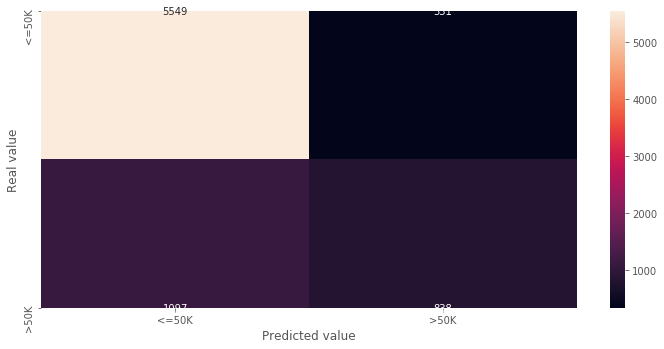

In [46]:
cls = linear_model.LogisticRegression()

cls.fit(X_train, y_train)
y_pred = cls.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,12))
plt.subplot(2,1,1)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=encoders["income"].classes_, yticklabels=encoders["income"].classes_)
plt.ylabel("Real value")
plt.xlabel("Predicted value")
print ("F1 score: %f" % skl.metrics.f1_score(y_test, y_pred))

In [47]:
from fairml import audit_model
from fairml import plot_dependencies

Feature: Unnamed: 0,	 Importance: 0.0010236724248240564
Feature: age,	 Importance: 0.07613563659628919
Feature: workclass,	 Importance: -0.024696097248880357
Feature: fnlwgt,	 Importance: 0.0008957133717210493
Feature: education,	 Importance: 0.03122200895713372
Feature: educational-num,	 Importance: 0.1201535508637236
Feature: marital-status,	 Importance: -0.054638515674984005
Feature: occupation,	 Importance: 0.026231605886116442
Feature: relationship,	 Importance: -0.10211132437619962
Feature: race,	 Importance: 0.021625079974408188
Feature: gender,	 Importance: 0.08483685220729367
Feature: capital-gain,	 Importance: 0.08867562380038388
Feature: capital-loss,	 Importance: 0.029558541266794625
Feature: hours-per-week,	 Importance: 0.06935380678182981
Feature: native-country,	 Importance: 0.002687140115163148


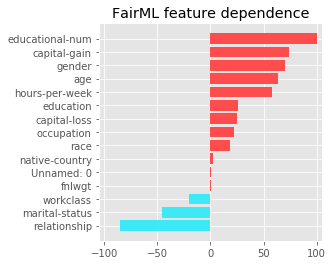

In [48]:
#  call audit model with model
total, _ = audit_model(cls.predict, X_test)

# print feature importance
print(total)

# generate feature dependence plot
fig = plot_dependencies(
    total.median(),
    reverse_values=False,
    title="FairML feature dependence"
)
plt.savefig("fairml_ldp.eps", transparent=False, bbox_inches='tight')

In [49]:
type(total)

fairml.orthogonal_projection.AuditResult